## Data Visualizations

### This script contains the following points:
#### 01. Creating Bar Charts
#### 02. Exporting Charts
#### 03. Creating Histograms and Scatterplots
#### 04. Creating Line Charts
#### 05. Sampling Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
working_directory = os.getcwd()
print(working_directory)

/Users/schitchards/Documents/Data Analytics/Programming/Instacart Basket Analysis/03 Scripts


In [3]:
path = r'/Users/schitchards/Documents/Data Analytics/Programming/Instacart Basket Analysis'

In [6]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_flags.pkl'))

In [7]:
df.shape

(32404859, 24)

In [8]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'active', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'Spending', 'spending_flag', 'median_days_since_order',
       'order_frequency_flag'],
      dtype='object')

In [9]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,active,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Spending,spending_flag,median_days_since_order,order_frequency_flag
0,2539329,1,1,2,8,7.0,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least Busy,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least Busy,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


### 01. Creating Bar Charts

In [ ]:
# Create bar chart for orders_day_of_week according to index
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [ ]:
# Change color of bar plot
df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'orange')

In [ ]:
# Save chart within the bar object
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'orange')

In [ ]:
df['orders_day_of_week'].value_counts(dropna = False)

In [ ]:
df['orders_day_of_week'].value_counts(dropna = False).sort_index()

### 02. Exporting Charts

In [ ]:
# Export bar chart outside of Jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_dow.png'))

### 03. Creating Histograms and Scatterplots

In [ ]:
# Create Histogram
df['prices'].plot.hist(bins = 25)

single bar shows that there is data corruption and an extreme outlier is affecting the output.

In [ ]:
# Create a scatterplot to help visualize the distribution of data points
sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [ ]:
# Investigate the data points above the normal price of 100 for a supermarket (only show prices column)
df.loc[df['prices'] > 100]

In [ ]:
# Turn unexplained data into missing
df.loc[df['prices'] > 100, 'prices'] =np.nan

In [ ]:
# Check whether the replacement was successful
df['prices'].max()

In [ ]:
# Re-try histogram with 25 bins
hist = df['prices'].plot.hist(bins = 25)

In [ ]:
# Increase level of granularity in histogram with 70 bins
hist_2 = df['prices'].plot.hist(bins = 70)

In [ ]:
# Export histograms 
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_orders_dow.png'))

In [ ]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist2_orders_dow.png'))

### 04. Creating Line Charts

line = sns.lineplot(data = df, x = 'time column', y = 'changing variable')

Cant check in this data set as there are no time columns. In the next section a sample of data is created to make a line chart or prices over days of the week. Since there are so many data points it would cause the computer to crash and that is why sampling needs to be done.

### 05. Sampling Data

In [10]:
# Set seed to represent a random but reproducible pattern (can use any number but always use the same # to ensure you get the same random pattern)
np.random.seed(4)

In [11]:
# Create a list holding True/False values to the test np.random.rant() <=0.7
dev = np.random.rand(len(df)) <= 0.7 

In [12]:
# New list of dev gives an output of True or False for every value based on whether it's less than or equal to 0.7
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
# Store 70% of the sample in the dataframe big
big = df[dev]

In [14]:
# Store 30% of the sample data in the dataframe small
small = df[~dev]

In [15]:
# Check number of rows or original data
len(df)

32404859

In [16]:
# Check total of new dataframes big and small to make sure they match org.
len(big) + len(small)

32404859

In [17]:
# Reduce sample to only necessary columns to speed up processing
df_2 = small[['orders_day_of_week','prices']]

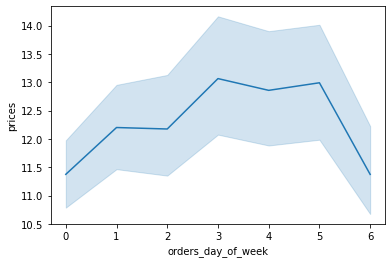

In [18]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')